In [25]:
#!pip3 install pycaret

In [26]:
#pip install --user pycaret

In [27]:
from pycaret.utils import version
version()

'2.1.2'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as mo

In [3]:
df=pd.read_csv('newmri.csv')

In [4]:
df.head()

,Unnamed: 0,acc_itn,priority,acct,stp_dtime,ord_for_dtime,dept,proc_no,cpt_code,pt_adm_no_ext,duration
0,0,7231535,Routine,4004017060,2017-12-04 17:11:00,2017-12-04 01:56:00,MRI,1601,70543.0,4004017060,915.0
1,1,7231655,Routine,4004017134,2017-04-13 17:20:00,2017-12-04 08:06:00,MRI,1602,72197.0,4004017134,337846.0
2,2,7231760,Routine,6223112189,2017-12-04 22:07:00,2017-12-04 09:26:00,MRI,1604,74183.0,6223112189,761.0
3,3,7231762,Routine,6223112302,2017-12-04 16:16:00,2017-12-04 09:32:00,MRI,1554,70553.0,6223112302,404.0
4,4,7231812,Routine,6223108688,2017-12-04 21:52:00,2017-12-04 09:59:00,MRI,447,70551.0,6223108688,713.0


In [5]:
newdf= df[['acc_itn','priority','acct','dept','proc_no','cpt_code','pt_adm_no_ext','duration']]

In [6]:
newdf.head()

,acc_itn,priority,acct,dept,proc_no,cpt_code,pt_adm_no_ext,duration
0,7231535,Routine,4004017060,MRI,1601,70543.0,4004017060,915.0
1,7231655,Routine,4004017134,MRI,1602,72197.0,4004017134,337846.0
2,7231760,Routine,6223112189,MRI,1604,74183.0,6223112189,761.0
3,7231762,Routine,6223112302,MRI,1554,70553.0,6223112302,404.0
4,7231812,Routine,6223108688,MRI,447,70551.0,6223108688,713.0


In [34]:
#newdf['view']=newdf['view'].astype(str)

In [35]:
#newdf['bathrooms']=newdf['bathrooms'].astype(str)

In [36]:
#newdf['waterfront']=newdf['waterfront'].astype(str)

In [37]:
#newdf['floors']=newdf['floors'].astype(str)

In [38]:
#newdf['year']=newdf['year'].astype(str)

In [39]:
#newdf['grade']=newdf['grade'].astype(str)

In [40]:
#newdf['bedrooms']=newdf['bedrooms'].astype(str)

In [41]:
#newdf['price']=np.log1p(newdf['price'])

In [8]:
from pycaret import regression


In [9]:
regression_setup = regression.setup(data= newdf, target='duration')


 
Setup Succesfully Completed.


,Description,Value
0,session_id,5208
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4755, 8)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
regression_lr = regression.create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,30430.5867,3945163056.1492,62810.5330,0.0010,3.1152,34.6268
1,37141.8263,6846671549.1702,82744.6164,0.0006,3.1616,31.8448
2,27412.8081,2640223742.3942,51383.1076,0.0035,3.1571,32.8572
3,31532.2367,4316494265.8303,65700.0325,0.0039,3.0702,31.0139
4,29470.0135,3548199086.6277,59566.7616,0.0013,3.1421,34.6623
5,32379.3875,5005712989.8554,70751.0635,0.0023,3.1716,37.6761
6,26431.3231,2116104591.0911,46001.1368,0.0275,3.1250,38.0533
7,29390.7019,3202881032.7007,56594.0017,-0.0028,3.1507,36.5258
8,27567.8542,2143792355.2324,46301.1053,-0.0229,3.2542,39.2632
9,27373.2102,2568735420.6678,50682.6935,0.0112,3.1497,34.7767


In [11]:
regression_dt = regression.create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15394.3033,2546193118.3514,50459.8169,0.3553,2.2949,18.1764
1,18561.3514,3558021184.5045,59649.1507,0.4806,2.2429,16.7082
2,17266.1051,3080694723.4444,55504.0064,-0.1628,2.1249,24.4931
3,20349.2492,4061165910.3724,63727.2776,0.0628,2.2233,24.2446
4,15682.8438,3204460126.5435,56607.9511,0.0981,2.1911,35.4723
5,25397.0270,5797204705.4595,76139.3768,-0.1554,2.4526,22.7111
6,19002.9339,4241431563.7147,65126.2740,-0.9492,2.1878,41.9856
7,15506.5195,3155065144.4294,56169.9666,0.0121,2.0779,23.0803
8,12779.6114,1574173232.7801,39675.8520,0.2489,2.0893,16.1354
9,14363.8404,1703874607.6837,41278.0160,0.3441,2.1462,19.8682


In [12]:

regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Random Forest,17721.3231,1983269383.5168,43751.1068,0.4469,2.2892,26.8042,0.8302
1,Extreme Gradient Boosting,17013.6553,2017751022.9396,43816.2740,0.4385,2.3446,29.0489,0.2853
2,Gradient Boosting Regressor,21862.3250,2127754261.0180,44930.7694,0.4274,2.7910,32.3007,0.4874
3,Light Gradient Boosting Machine,23749.6208,2652616816.7891,50919.5488,0.2494,2.6928,33.5355,0.1827
4,CatBoost Regressor,23355.5517,2788638873.7956,51858.6024,0.2266,2.6992,33.0841,4.0364
5,K Neighbors Regressor,22540.9881,2918798618.6816,53402.1295,0.1760,2.3702,33.7425,0.0405
6,Extra Trees Regressor,21861.9128,3014156559.6985,54382.8552,0.1303,2.3289,23.3861,0.5389
7,Decision Tree,17430.3785,3292228431.7284,56433.7688,0.0335,2.2031,24.2875,0.0349
8,Lasso Least Angle Regression,29920.2740,3632465767.5499,59244.2251,0.0029,3.1532,35.2634,0.0261
9,Lasso Regression,29912.6241,3633276239.2774,59251.7833,0.0027,3.1512,35.1260,0.0577


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=5208, verbose=0, warm_start=False)

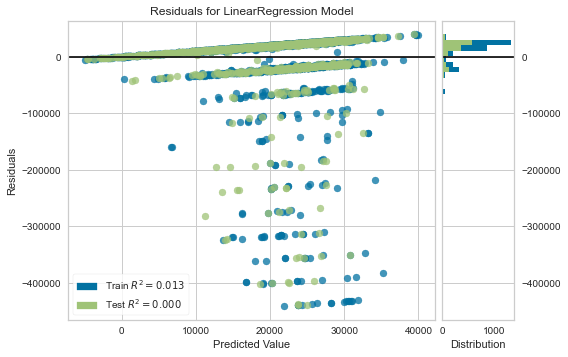

In [13]:
regression.plot_model(regression_lr, plot ='residuals')

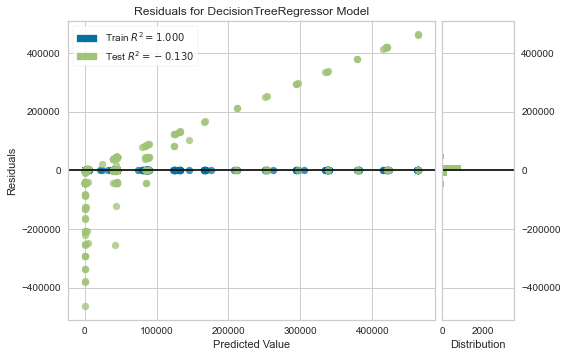

In [14]:
regression.plot_model(regression_dt, plot = 'residuals')

In [15]:
regression.plot_model(regression_lr, plot = 'parameter')

,Parameters
copy_X,True
fit_intercept,True
n_jobs,-1
normalize,False


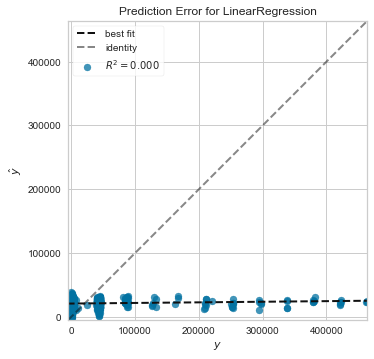

In [16]:
regression.plot_model(regression_lr,plot="error")

In [17]:
 
regression.evaluate_model(regression_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…